In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
import sys
np.set_printoptions(precision=2)

In [2]:
class KF():
    def __init__(self, A, B, H, R, Q):
        self.A = A
        self.B = B
        self.H = H
        self.R = R
        self.Q = Q
        self.P = np.eye(self.Q.shape[0]) * 10000
        self.x = np.ones(self.Q.shape[0])
        self.log_x = []
    
    def predict(self, u=None):
        xminus = self.A.dot(self.x)
        Pminus = self.A.dot(self.P).dot(self.A.T) + self.Q
        self.x = xminus
        self.P = Pminus
    
    def correct(self, yt):
        HPHT = self.H.dot(self.P).dot(self.H.T)
        bracket_inv = np.linalg.inv(HPHT + self.R)
        K = self.P.dot(self.H.T).dot(bracket_inv)
        innovation = yt - self.H.dot(self.x)
        xplus = self.x + K.dot(innovation)
        bracket = np.eye(K.shape[0]) - K.dot(self.H)
        KRKT = K.dot(self.R).dot(K.T)
        Pplus = zavorka.dot(self.P).dot(bracket.T) + KRKT
        self.x = xplus
        self.P = Pplus
    
    def log(self):
        self.log_x.append(self.x)

# Structural models

The structural models are state-space models that provide flexible modelling of various time series. In this task, we focus on the most simple yet very powerful model: the local linear trend model. We assume:
- $y_t$ - observed variable
- $\mu$ - hidden mean of $y_t$ influenced by own previous value $\mu_{t-1}$, a drift variable $\nu_t$, and a noise $\xi_t$
- $\nu_t$ - hidden drift, modelled as a random walk with noise $\zeta_t$.

All variables are assumed normal. That is, the state-space model equations read:

$$
\begin{alignat}{2}
y_t &= \mu_t + \varepsilon_t, \qquad &\varepsilon \sim \mathcal{N}(0, \sigma_{\varepsilon}^2), \\
\mu_t &= \mu_{t-1} + \nu_{t-1} + \xi_t, \qquad &\xi_t \sim \mathcal{N}(0, \sigma_{\xi}^2), \\
\nu_t &= \nu_{t-1} + \zeta_t, \qquad &\zeta_t \sim \mathcal{N}(0, \sigma_{\zeta}^2).
\end{alignat}
$$

Note: $y_t$ is observed, while $\mu_t$ and $\nu_t$ are hidden states.

Let us try to simulate this series:

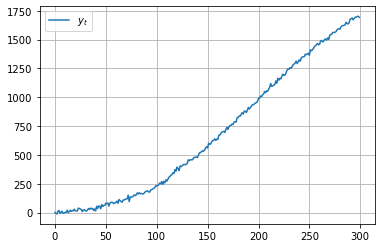

In [3]:
ndat = 300
pred = 50
sigma_epsilon = 10
sigma_xi = .9
sigma_zeta = .3
mu = np.zeros(ndat)
nu = np.zeros(ndat)
y = np.zeros(ndat)

for t in range(1, ndat):
    nu[t] = nu[t-1] + norm.rvs(scale=sigma_zeta)
    mu[t] = mu[t-1] + nu[t-1] + norm.rvs(scale=sigma_xi)
    y[t] = mu[t] + norm.rvs(scale=sigma_epsilon)
    
plt.plot(y, label=r'$y_t$')
plt.legend()
plt.show()

Try to run the simulation several times. Experiment with variances.

## Task 1 (12 pts.):

Using the Kalman filter or the particle filter (or both), try to estimates states. That is:
1. Formulate the state-space model in the matrix form.
2. Prepare the Kalman filter (code above) or the particle filter.
3. Feed the filter sequentially with data $y_t$ and estimate states.
4. Discuss your results.

## Task 2 (13 pts.):

The file '20180224_Gp_part_5m.txt' contains the record of measurements of the electron and proton flux in the solar wind. These measurements were obtained from an instrument in the [GOES-15](https://en.wikipedia.org/wiki/GOES_15) satelite. 

Select the column "Electrons at >2.0 Mev" and try to model it using the local linear trend model. The unknown variance of the noise can be tuned, e.g., by try-and-fail approach. It's quite easy.